In [6]:
# Python 3 compatability
from __future__ import division, print_function
from builtins import range

# system functions that are always useful to have
import time, sys, os

# basic numeric setup
import numpy as np
import math
from numpy import linalg
from scipy.interpolate import interp1d, RegularGridInterpolator

# inline plotting
%matplotlib inline

# plotting
import matplotlib
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sea
# seed the random number generator
np.random.seed(7)

from spec_exam import Gen_spec
from sim_engine import forward_model_grism, Salmon
import fsps
from spec_id import Scale_model
from spec_tools import Oldest_galaxy

import dynesty
from dynesty import plotting as dyplot
from glob import glob

In [3]:
# re-defining plotting defaults
from matplotlib import rcParams
rcParams.update({'xtick.major.pad': '7.0'})
rcParams.update({'xtick.major.size': '7.5'})
rcParams.update({'xtick.major.width': '1.5'})
rcParams.update({'xtick.minor.pad': '7.0'})
rcParams.update({'xtick.minor.size': '3.5'})
rcParams.update({'xtick.minor.width': '1.0'})
rcParams.update({'ytick.major.pad': '7.0'})
rcParams.update({'ytick.major.size': '7.5'})
rcParams.update({'ytick.major.width': '1.5'})
rcParams.update({'ytick.minor.pad': '7.0'})
rcParams.update({'ytick.minor.size': '3.5'})
rcParams.update({'ytick.minor.width': '1.0'})
rcParams.update({'font.size': 20})

In [4]:
sp = fsps.StellarPopulation(imf_type = 2, tpagb_norm_type=0, zcontinuous = 1, logzsol = np.log10(1), sfh = 3, dust_type = 1)

Gs = Gen_spec('GND', 21156, 1.253,
               g102_lims=[8300, 11500], g141_lims=[11100, 16500],mdl_err = True,
            phot_errterm = 0.03, decontam = True) 

cleaned


/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.8.0_4_g1153432-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:548: RuntimeWarning: invalid value encountered in true_divide
  self.optimal_profile = m/m.sum(axis=0)
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.8.0_4_g1153432-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3423: RuntimeWarning: divide by zero encountered in true_divide
  self.ivar = 1/self.grism.data['ERR']**2


In [30]:
sp.params['sfh'] = 3
sp.params['logzsol'] = np.log10( 0.6)
sp.params['dust2'] = 0.1
sp.set_tabular_sfh(np.array([0.1, 0.5, 1, 2, 4, 6]),np.array([1,  0.2, 0.8,
         0.4 ,  0.0,  0.1]))

wave,flux = sp.get_spectrum(tage = 4.2,peraa=True)

In [101]:
np.array(Mps)

array([4.23240862e-02, 7.16531311e-02, 1.08649552e-01, 9.44378014e-02,
       6.15637490e-02, 3.56739933e-02, 1.01069205e-02, 2.54526760e-03,
       6.47838717e-06, 5.14707064e-10])

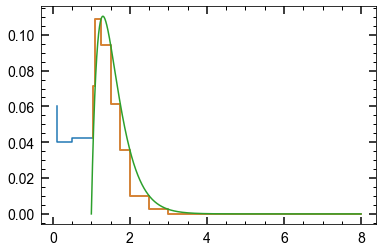

In [104]:
t= np.arange(0,6,.1)
plt.step(np.array([0.1, 0.5, 1.05, 1.1, 1.25, 1.5, 1.75, 2, 2.5, 3, 5, 8]),
                   np.array([0.06,0.04,4.23240862e-02, 7.16531311e-02, 1.08649552e-01, 9.44378014e-02,
       6.15637490e-02, 3.56739933e-02, 1.01069205e-02, 2.54526760e-03,
       6.47838717e-06, 5.14707064e-10]))

plt.step(np.array(tbin) + 1,np.array(Mps))
plt.plot(T+1,SFR)

In [177]:
T = np.arange(0,7.001,0.001)
SFR = T*np.exp(-T/0.2)
Mps = []

tbin = [0.1, 0.2,0.3, 0.4,0.5,0.6, 0.7,0.8,0.9, 1, 2, 4, 7]
# tbin = np.linspace(0.01,7,100)

for i in range(len(tbin)):
#     Mps.append(np.mean(interp1d(T,SFR)([extbin[i],extbin[i+1]])))
    Mps.append(interp1d(T,SFR)(tbin[i]))
    

In [32]:
def Cumlative_dist(dist,x):
    
    dist = dist / np.trapz(dist,x)
    
    C = []   
    for i in range(len(dist)):
        C.append(np.trapz(dist[:i], x[:i]))

    return np.array(C)

def Mass_build_up(dist,x,limits, step = False):    
    dist = dist / np.trapz(dist,x)
    newx = np.linspace(limits[0], limits[1],1000)

    if not step:
        idist = interp1d(x,dist)(newx)

    if step:
        idist = []

        for i in newx:
            for ii in range(len(x) - 1):
                if x[ii] <= i < x[ii + 1]:
                    idist.append(dist[ii + 1])
    
    plt.plot(newx,idist)
    
    
    C = []   
    for i in range(len(newx)):
        C.append(np.trapz(idist[:i], newx[:i]))

    return newx, np.array(C)

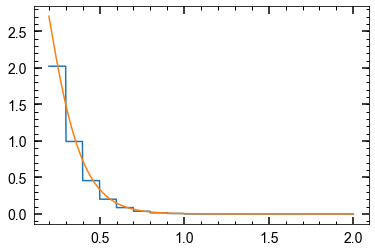

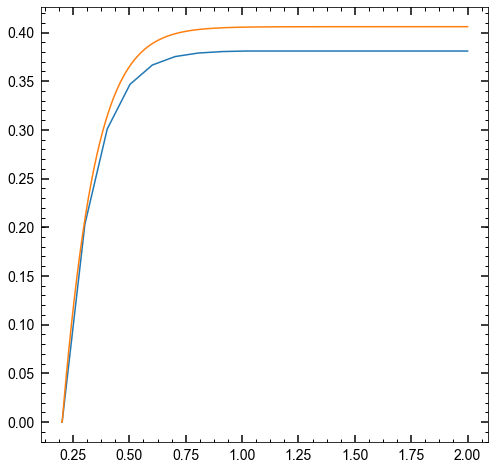

In [171]:
nx, mfs = Mass_build_up(Mps,tbin,[0.2,2], step = True)
nx, mfr = Mass_build_up(SFR,T,[0.2,2])


plt.figure(figsize = [8,8])
plt.plot(nx,mfs)
plt.plot(nx,mfr)

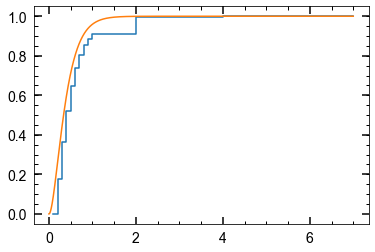

In [164]:
plt.step(tbin,Cumlative_dist(np.array(Mps),tbin))
plt.plot(T,Cumlative_dist(SFR,T))

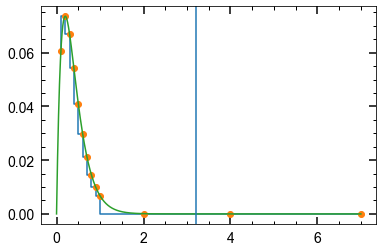

In [178]:
plt.step(tbin,np.array(Mps))
plt.plot(tbin,np.array(Mps),'o')

plt.plot(T,SFR)
plt.axvline(3.2)

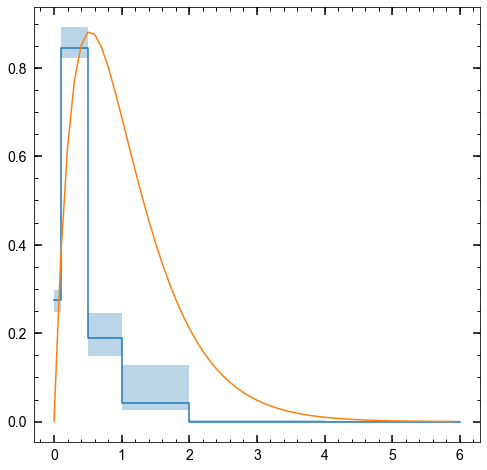

In [154]:
t= np.arange(0,6,.1)
plt.figure(figsize=[8,8])
plt.step(np.array([0,0.1, 0.5, 1, 2, 4, 6]),np.array([0.274,0.274,  0.845, 0.188,
         0.042,  0.0,  0.0]))
plt.fill_between(np.array([0,0.1, 0.5, 1, 2, 4, 6]),[0.274 - 0.026,0.274 - 0.026,0.845-0.022, 0.188-0.039,0.042 -0.016,-0.0009,0],
                 [0.274 + 0.024,0.274 + 0.024,0.845+0.048, 0.188+0.058,0.042+0.085,0.004,0.001], step = 'pre',alpha = .3)

plt.plot(t, t * np.exp(-t / 0.533) * 4.5)

In [180]:
sp = fsps.StellarPopulation(imf_type = 2, tpagb_norm_type=0, zcontinuous = 1, logzsol = np.log10(0.8), sfh = 3,
                           dust_type = 1)
sp.params['dust2'] = 0.2
sp.set_tabular_sfh(np.array(tbin),np.array(Mps))

# sp.set_tabular_sfh(np.array([0.1, 0.5, 1.05, 1.1, 1.25, 1.5, 1.75, 2, 2.5, 3, 5, 8]),
#                    np.array([0.06,0.04,4.23240862e-02, 7.16531311e-02, 1.08649552e-01, 9.44378014e-02,
#        6.15637490e-02, 3.56739933e-02, 1.01069205e-02, 2.54526760e-03,
#        6.47838717e-06, 5.14707064e-10]))

sp.params['compute_light_ages'] = True

print(sp.get_mags(tage=3.2,bands=['sdss_g']))

sp.params['compute_light_ages'] = False

wave,flux = sp.get_spectrum(tage=3.2,peraa=True)


[2.62868393]


In [181]:
sp = fsps.StellarPopulation(imf_type = 2, tpagb_norm_type=0, zcontinuous = 1, logzsol = np.log10(0.8), sfh = 4, tau = 0.2,
                           dust_type = 1)
sp.params['dust2'] = 0.2

sp.params['compute_light_ages'] = True

print(sp.get_mags(tage=3.2,bands=['sdss_g']))

sp.params['compute_light_ages'] = False

wave1,flux1 = sp.get_spectrum(tage=3.2,peraa=True)

[2.75935746]


(3, 5)

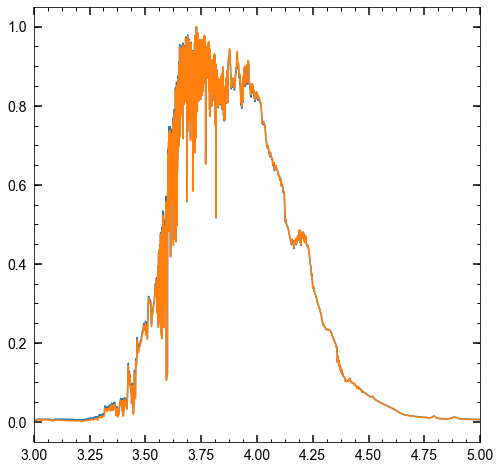

In [184]:
plt.figure(figsize=[8,8])
plt.plot(np.log10(wave),flux/max(flux))
plt.plot(np.log10(wave1),flux1/max(flux1))

plt.xlim(3,5)

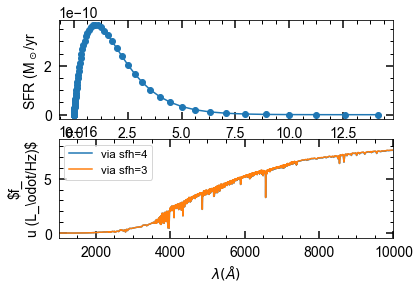

In [122]:
sps = fsps.StellarPopulation()

# get the spectrum via the intrinsic SFH convolutions
sps.params["sfh"] = 4  #delayed_exponential
sdss_bands = fsps.find_filter("sdss")
mags = sps.get_mags(bands=sdss_bands)
age = (10 ** sps.log_age) / 1e9
sfr = sps.sfr
wavelength, spectrum = sps.get_spectrum(tage=13.7)

# get the spectrum from a tabular version
sps.params["sfh"] = 3
sps.set_tabular_sfh(age, sfr)
wavelength, spectrum1 = sps.get_spectrum(tage=13.7)

# Plot the SFR
fig, axes = plt.subplots(2, 1)
axes[0].plot(age, sfr, '-o')
axes[0].set_xlabel('Age (Gyr)')
axes[0].set_ylabel('SFR (M$_\odot$/yr')
axes[1].plot(wavelength, spectrum, label="via sfh=4")
axes[1].plot(wavelength, spectrum1, label="via sfh=3")
axes[1].set_xlim(1e3, 1e4)
axes[1].set_xlabel('$\lambda (\AA)$')
axes[1].set_ylabel('$f_\nu (L_\odot/Hz)$')
axes[1].legend(loc=0)
plt.show()

In [16]:
sp = fsps.StellarPopulation(imf_type = 2, tpagb_norm_type=0, zcontinuous = 1, logzsol = np.log10(1), sfh = 4, tau = 0.1,
                           dust_type = 1)
Gs.Make_sim(wave,flux,1.25)

([<matplotlib.axis.XTick at 0x1a71eb05f8>,
 <a list of 6 Text xticklabel objects>)

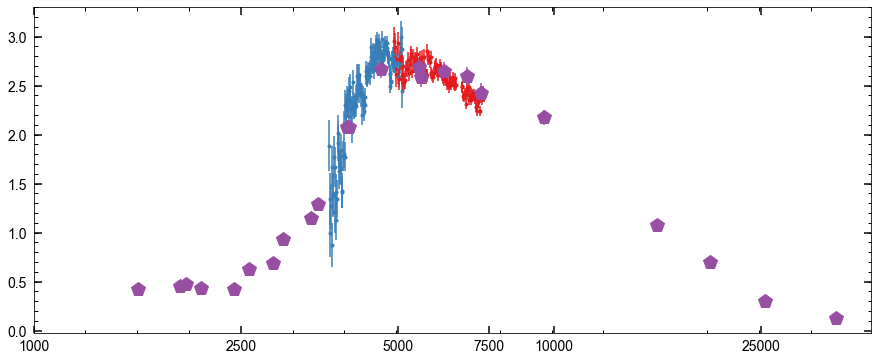

In [17]:
plt.figure(figsize = [15,6])
plt.errorbar(np.log10(Gs.Bwv_rf),Gs.SBfl*1E18,Gs.SBer*1E18,
                linestyle='None', marker='o', markersize=3, color='#377eb8')
plt.errorbar(np.log10(Gs.Rwv_rf),Gs.SRfl*1E18,Gs.SRer*1E18,
                linestyle='None', marker='o', markersize=3, color='#e41a1c')
plt.errorbar(np.log10(Gs.Pwv_rf),Gs.SPflx*1E18,Gs.SPerr*1E18,
                                 linestyle='None', marker='p', markersize=15, color='#984ea3')
plt.xticks(np.log10([1000,2500,5000,7500,10000,25000]),[1000,2500,5000,7500,10000,25000])

([<matplotlib.axis.XTick at 0x1a6e8742e8>,
 <a list of 6 Text xticklabel objects>)

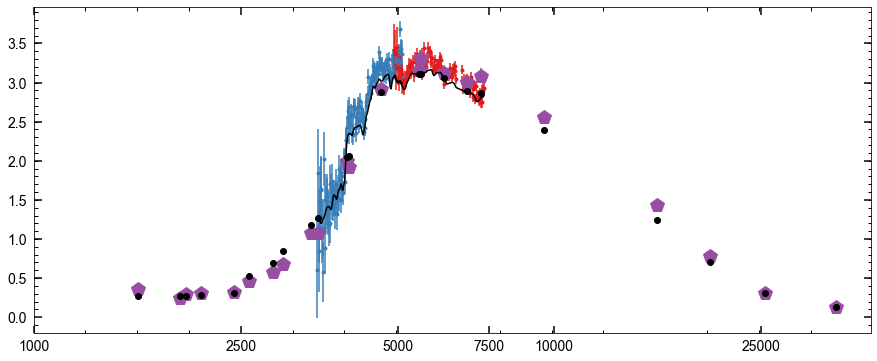

In [6]:
sp.params['logzsol'] = np.log10( 0.328 )
sp.params['tau'] = 0.01
sp.params['dust2'] = 0.2

wave, flux = sp.get_spectrum(tage = 3.21, peraa = True)
sp.params['tau'] = 0.01

wave, flux_b = sp.get_spectrum(tage = 0.01, peraa = True)

# 3.28629085e-01, 3.21741605e+00, 1.09566430e-02, 1.25318107e+00,
#        2.07411413e-01, 3.49182299e-05

Bmfl, Rmfl, Pmfl = Full_forward_model(Gs, wave, flux + 0.000035 * flux_b, 1.2532)

PC= Full_scale(Gs, Pmfl)

Bchi, Rchi, Pchi = Full_fit(Gs, PC * Bmfl, PC * Rmfl, PC * Pmfl)

plt.figure(figsize = [15,6])
plt.errorbar(np.log10(Gs.Bwv_rf),Gs.Bfl*1E18,Gs.Ber*1E18,
                linestyle='None', marker='o', markersize=3, color='#377eb8')
plt.errorbar(np.log10(Gs.Rwv_rf),Gs.Rfl*1E18,Gs.Rer*1E18,
                linestyle='None', marker='o', markersize=3, color='#e41a1c')
plt.errorbar(np.log10(Gs.Pwv_rf),Gs.Pflx*1E18,Gs.Perr*1E18,
                                 linestyle='None', marker='p', markersize=15, color='#984ea3')
plt.plot(np.log10(Gs.Bwv_rf), PC*Bmfl*1E18, 'k', zorder=5)
plt.plot(np.log10(Gs.Rwv_rf), PC*Rmfl*1E18, 'k', zorder=5)
plt.plot(np.log10(Gs.Pwv_rf), PC*Pmfl*1E18, 'ko', zorder=5)
plt.xticks(np.log10([1000,2500,5000,7500,10000,25000]),[1000,2500,5000,7500,10000,25000])


In [7]:
wave,flux = np.load('../data/sim_spec.npy')


In [18]:
wave

array([9.100e+01, 9.400e+01, 9.600e+01, ..., 9.817e+07, 9.908e+07,
       1.000e+08])

In [7]:
agelim = Oldest_galaxy(1.253 + .1)
     
def prior_transform(u):
    m = (0.03 * u[0] + 0.001) / 0.019
    a = agelim * u[1] + 0.1

    t1 = u[2]
    t2 = u[3]
    t3 = u[4]
    t4 = u[5]
    t5 = u[6]
    t6 = u[7]
    
    z = specz + 0.2*(2*u[8] - 1)
    d = 2*u[9]
    
    return [m, a, t1, t2, t3, t4, t5, t6, z, d]

In [9]:
def forward_model_all_beams(beams, trans, in_wv, model_wave, model_flux):
    FL = np.zeros([len(beams),len(in_wv)])

    for i in range(len(beams)):
        mwv, mflx = forward_model_grism(beams[i], model_wave, model_flux)
        FL[i] = interp1d(mwv, mflx)(in_wv)
        FL[i] /= trans[i]

    return np.mean(FL.T,axis=1)


def Full_forward_model(spec, wave, flux, specz):
    Bmfl = forward_model_all_beams(spec.Bbeam, spec.Btrans, spec.Bwv, wave * (1 + specz), flux)
    Rmfl = forward_model_all_beams(spec.Rbeam, spec.Rtrans, spec.Rwv, wave * (1 + specz), flux)
    Pmfl = spec.Sim_phot_mult(wave * (1 + specz),flux)

    return Bmfl, Rmfl, Pmfl

def Full_scale(spec, Pmfl):
    PC = Scale_model(spec.Pflx, spec.Perr, Pmfl)
    return PC

def Full_fit(spec, Bmfl, Rmfl, Pmfl):

    Bscale = Scale_model(spec.Bfl, spec.Ber, Bmfl)
    Rscale = Scale_model(spec.Rfl, spec.Rer, Rmfl)

    Bchi = np.sum(((((spec.Bfl/ Bscale) - Bmfl) / (spec.Ber / Bscale))**2))
    Rchi = np.sum(((((spec.Rfl/ Rscale) - Rmfl) / (spec.Rer / Rscale))**2))
    Pchi = np.sum((((spec.Pflx - Pmfl) / spec.Perr)**2))
    
    return Bchi, Rchi, Pchi

def loglikelihood(X):
    m, a, t1, t2, t3, t4, t5, t6, z, d = X
    
    sp.params['logzsol'] = np.log10( m )
    sp.params['dust2'] = d
    sp.set_tabular_sfh(np.array([0.1, 0.5, 1, 2, 4, 7]),
                       np.array([t1, t2, t3, t4, t5, t6]))
    
    wave, flux = sp.get_spectrum(tage = a, peraa = True)
    
    Bmfl, Rmfl, Pmfl = Full_forward_model(Gs, wave, flux, z)
    
    PC= Full_scale(Gs, Pmfl)

    Bchi, Rchi, Pchi = Full_fit(Gs, PC * Bmfl, PC * Rmfl, PC * Pmfl)
                  
    return -0.5 * (Bchi + Rchi + Pchi)

In [14]:
import ipyparallel as ipp

rc = ipp.Client()
nprocs = len(rc.ids)
print(rc.ids)

dview = rc[:]
dview.use_dill();

class Pool(object):
    """A simple wrapper for `dview`."""
    
    def __init__(self, dview):
        self.dview = dview
        self.size = nprocs
        
    def map(self, function, tasks):
        return self.dview.map_sync(function, tasks)

# define our pool
pool = Pool(dview)

[0, 1, 2, 3]


In [21]:
%%px

# import environment
import fsps
from spec_exam import Gen_spec
from sim_engine import *
import dynesty
from spec_tools import Oldest_galaxy
from scipy.interpolate import interp1d, RegularGridInterpolator
   
sp = fsps.StellarPopulation(imf_type = 2, tpagb_norm_type=0, zcontinuous = 1, logzsol = np.log10(1), sfh = 3, dust_type = 1)

Gs = Gen_spec('GND', 21156, 1.253,
               g102_lims=[8300, 11500], g141_lims=[11100, 16500],mdl_err = True,
            phot_errterm = 0.03, decontam = True) 

agelim = Oldest_galaxy(1.253 + .1)

specz = 1.253
def forward_model_all_beams(beams, trans, in_wv, model_wave, model_flux):
    FL = np.zeros([len(beams),len(in_wv)])

    for i in range(len(beams)):
        mwv, mflx = forward_model_grism(beams[i], model_wave, model_flux)
        FL[i] = interp1d(mwv, mflx)(in_wv)
        FL[i] /= trans[i]

    return np.mean(FL.T,axis=1)


def Full_forward_model(spec, wave, flux, specz):
    Bmfl = forward_model_all_beams(spec.Bbeam, spec.Btrans, spec.Bwv, wave * (1 + specz), flux)
    Rmfl = forward_model_all_beams(spec.Rbeam, spec.Rtrans, spec.Rwv, wave * (1 + specz), flux)
    Pmfl = spec.Sim_phot_mult(wave * (1 + specz),flux)

    return Bmfl, Rmfl, Pmfl

def Full_scale(spec, Pmfl):
    PC = Scale_model(spec.Pflx, spec.Perr, Pmfl)
    return PC

def Full_fit(spec, Bmfl, Rmfl, Pmfl):

    Bscale = Scale_model(spec.Bfl, spec.Ber, Bmfl)
    Rscale = Scale_model(spec.Rfl, spec.Rer, Rmfl)

    Bchi = np.sum(((((spec.Bfl/ Bscale) - Bmfl) / (spec.Ber / Bscale))**2))
    Rchi = np.sum(((((spec.Rfl/ Rscale) - Rmfl) / (spec.Rer / Rscale))**2))
    Pchi = np.sum((((spec.Pflx - Pmfl) / spec.Perr)**2))
    
    return Bchi, Rchi, Pchi

# seed the random number generator
np.random.seed(os.getpid())
print('Random seed:',os.getpid())

[stdout:0] 
cleaned
Random seed: 65009
[stdout:1] 
cleaned
Random seed: 65010
[stdout:2] 
cleaned
Random seed: 65011
[stdout:3] 
cleaned
Random seed: 65014


[stderr:0] 
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.8.0_4_g1153432-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:548: RuntimeWarning: invalid value encountered in true_divide
  self.optimal_profile = m/m.sum(axis=0)
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.8.0_4_g1153432-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3423: RuntimeWarning: divide by zero encountered in true_divide
  self.ivar = 1/self.grism.data['ERR']**2
[stderr:1] 
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.8.0_4_g1153432-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:548: RuntimeWarning: invalid value encountered in true_divide
  self.optimal_profile = m/m.sum(axis=0)
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.8.0_4_g1153432-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3423: RuntimeWarning: divide by zero encountered in true_divide
  self.ivar = 1/self.grism.data['ERR']**

In [22]:
# initialize our nested sampler
dsampler = dynesty.DynamicNestedSampler(loglikelihood, prior_transform, ndim = 10, sample = 'rwalk', pool = pool,bound = 'single') 

In [ ]:
# sample dynamically from the target distribution
dsampler.run_nested(wt_kwargs={'pfrac': 1.0}, dlogz_init=0.01, print_progress=True)


iter: 9942 | batch: 0 | bound: 516 | nc: 25 | ncall: 224723 | eff(%):  4.414 | loglstar:   -inf < -175.287 <    inf | logz: -196.748 +/-  0.202 | dlogz: 21.128 >  0.010            

In [13]:
# save results
dres = dsampler.results

(<Figure size 1152x1152 with 4 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a79b91e80>,
       dtype=object))

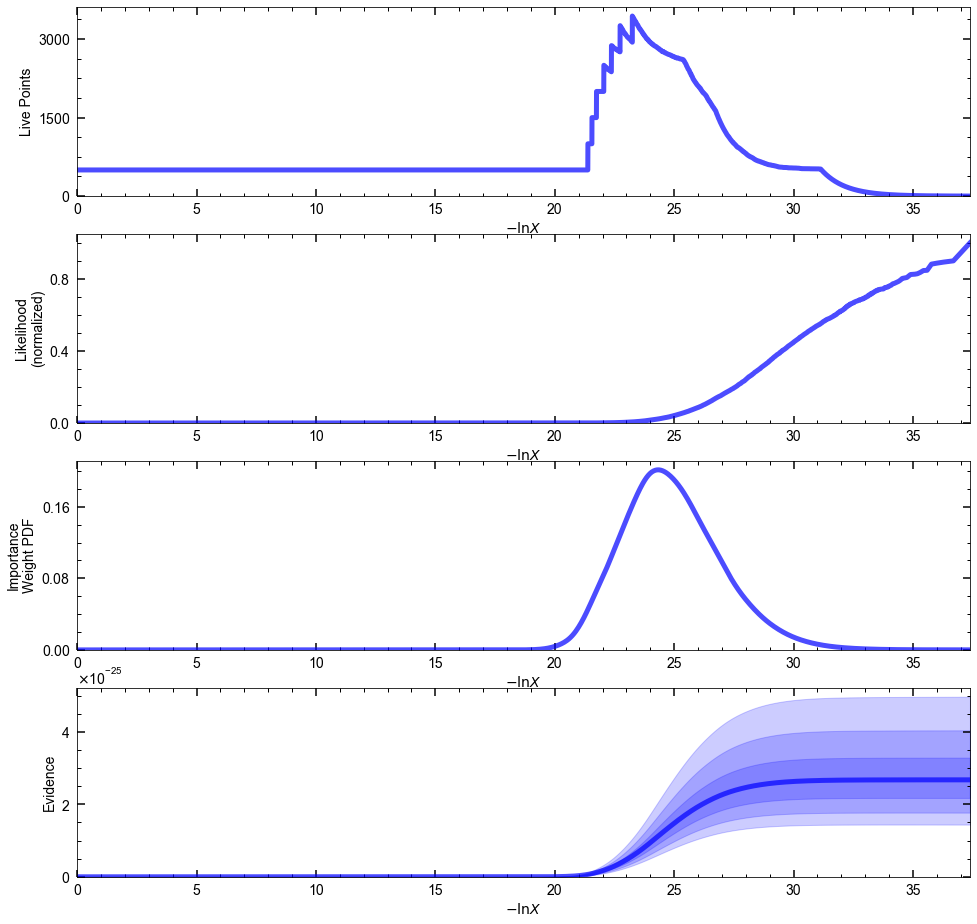

In [14]:
dyplot.runplot(dres)

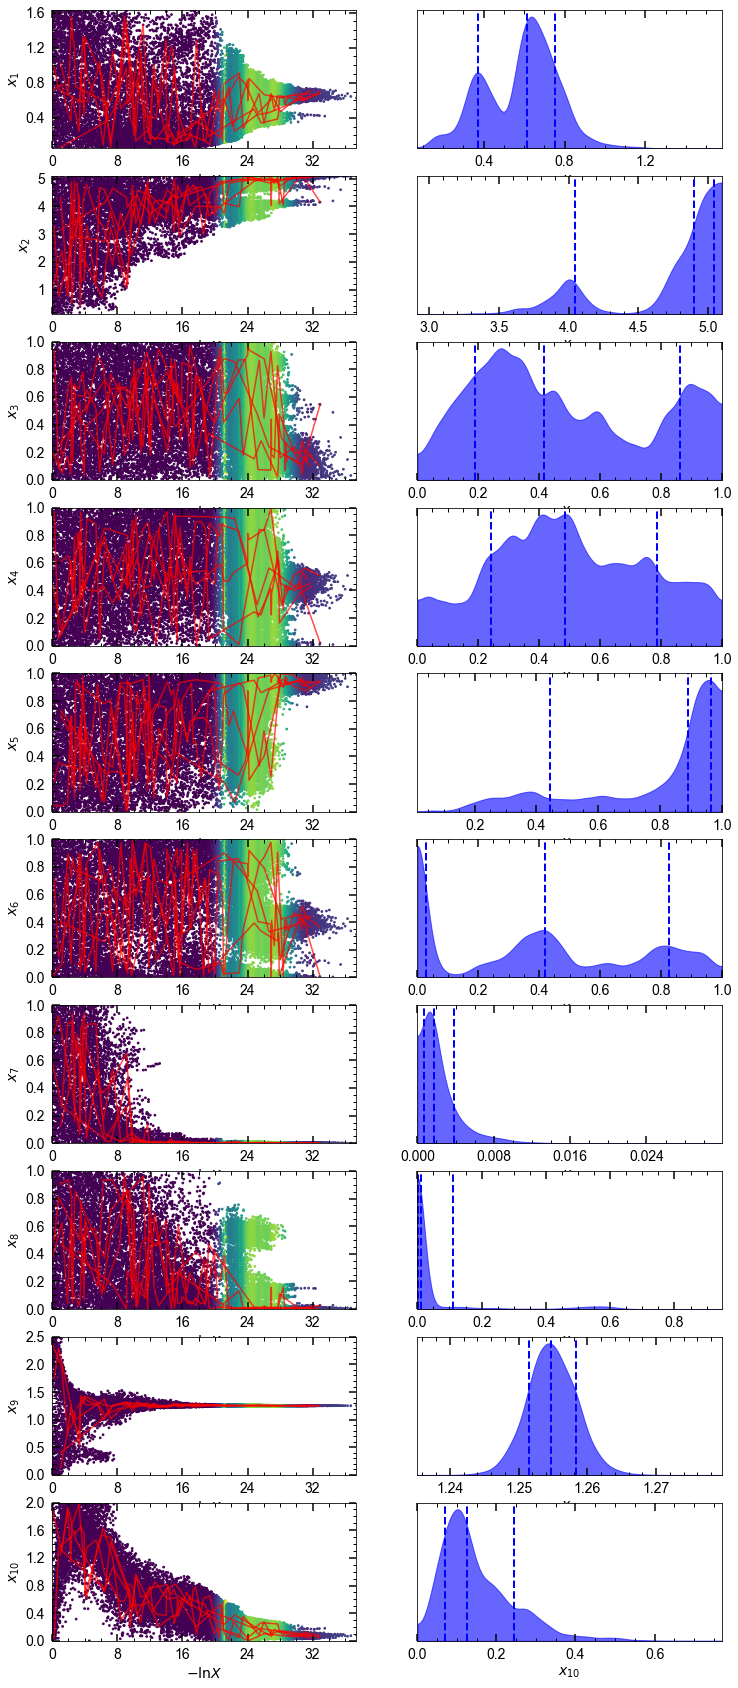

In [15]:
fig, axes = dyplot.traceplot(dres, truths=None, truth_color='black',
                             show_titles=False, title_kwargs={'fontsize': 5, 'y': 1.05},
                             trace_cmap='viridis', kde=False,
                             connect=True, connect_highlight=range(5))

(<Figure size 1605.6x1605.6 with 100 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a8044c0f0>,
       dtype=object))

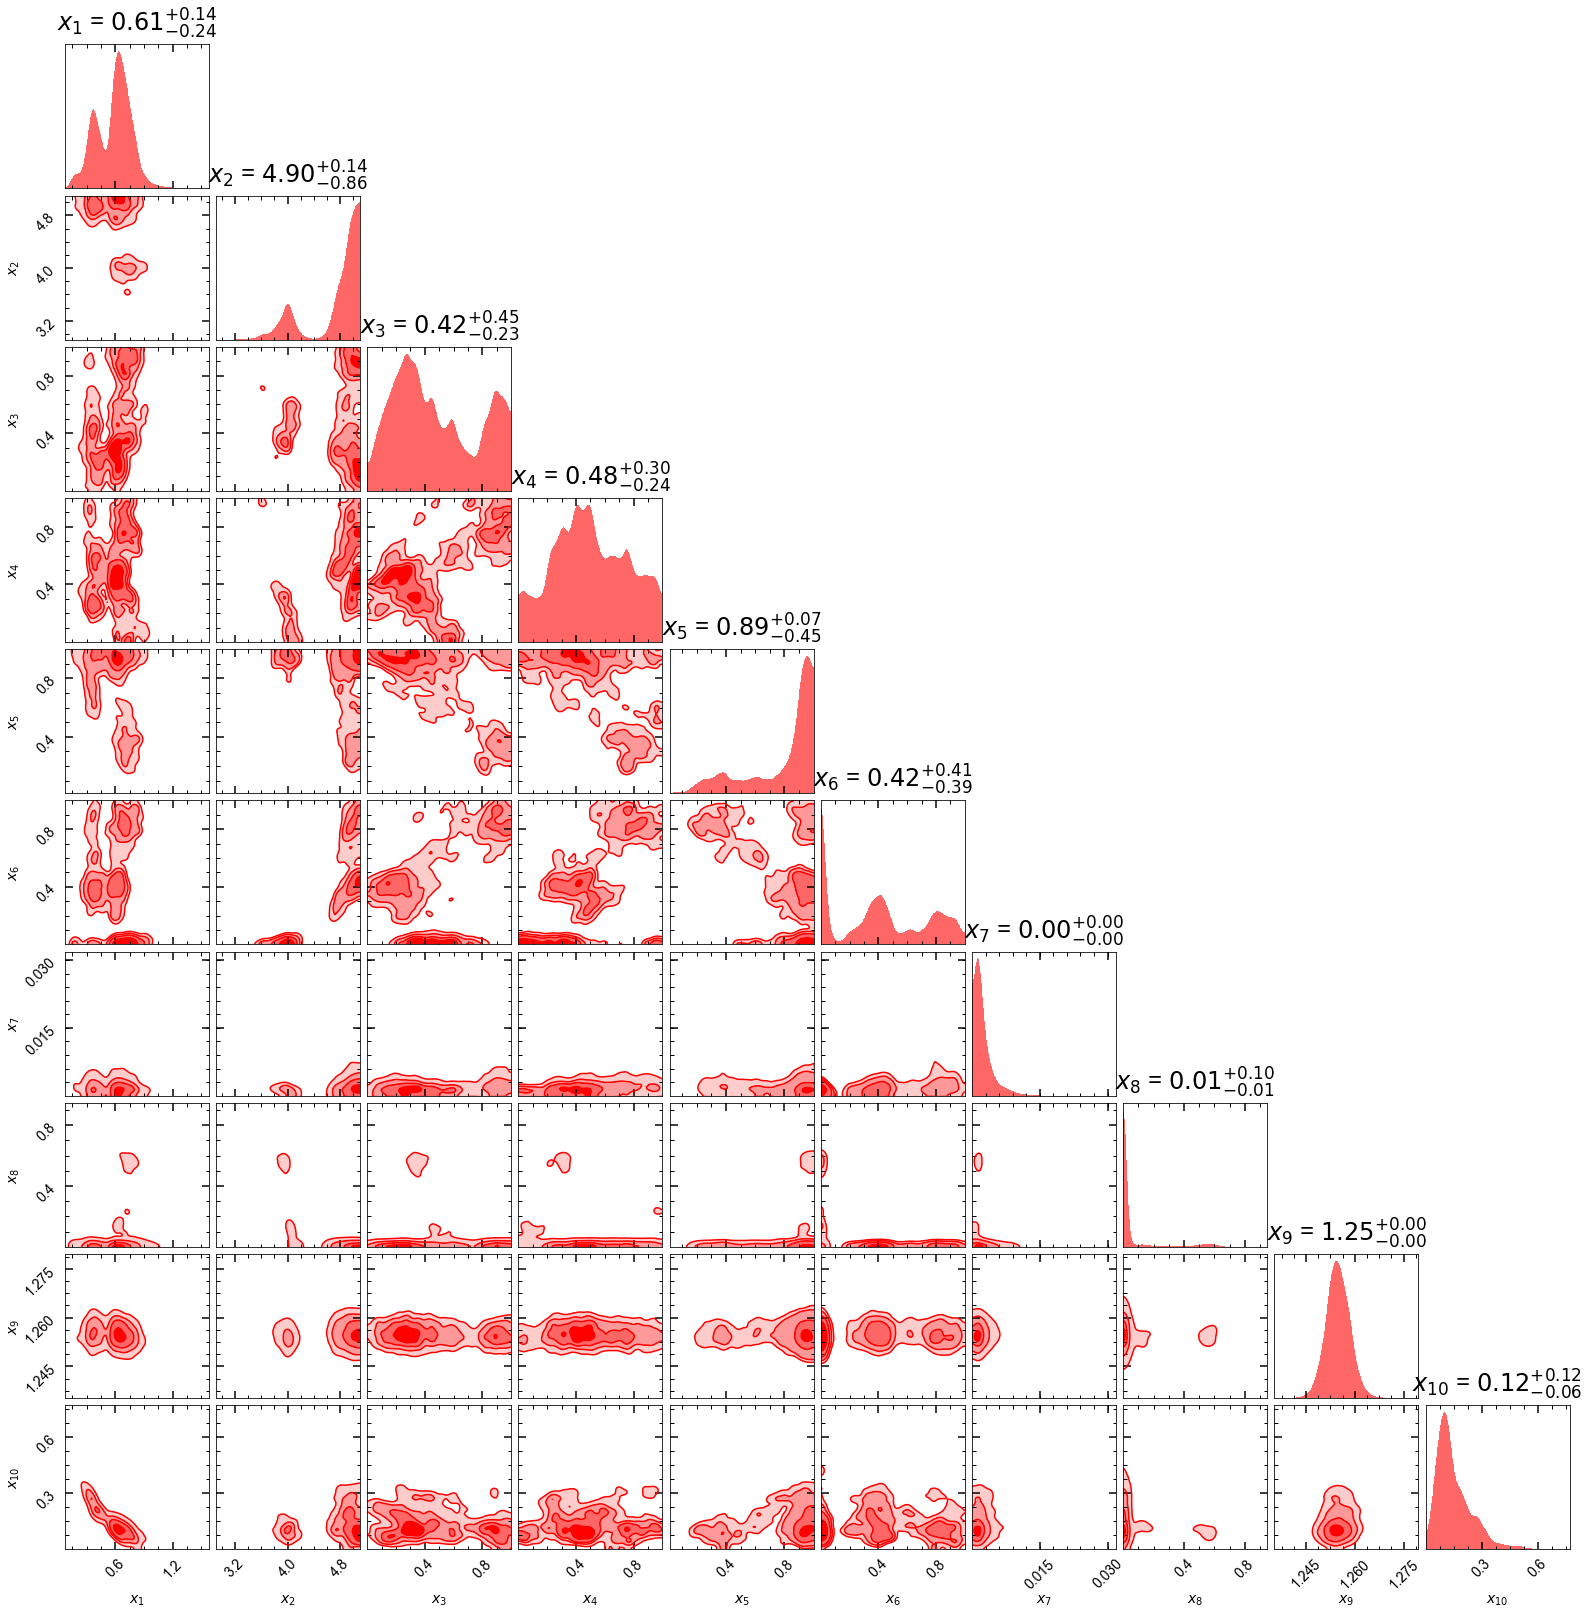

In [17]:
dyplot.cornerplot(dres, color='red', truths=None, truth_color='black',#labels = ['Z','t','$\\tau$','z','Av'],
                           show_titles=True, title_kwargs={'y': 1.05}, 
                           quantiles=None, max_n_ticks=3, )

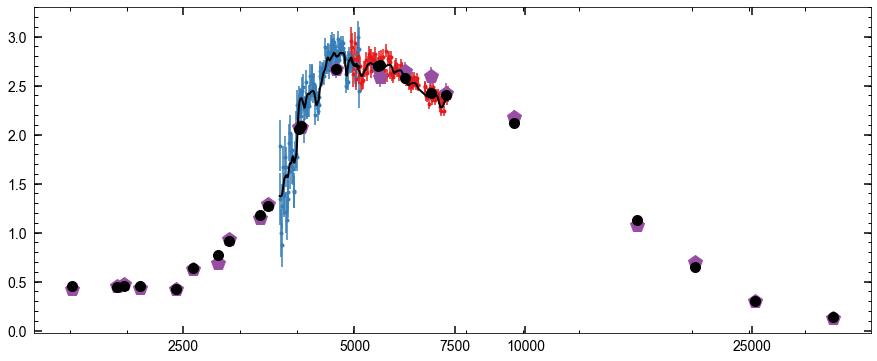

In [25]:
#  array([0.57029166, 3.07055345, 0.35029257, 1.24904928, 0.11330445]))

sp.params['logzsol'] = np.log10(0.58)
sp.params['tau'] = 0.31
sp.params['dust2'] = 0.11
    
wave,flux = sp.get_spectrum(tage = 2.73,peraa = True)
    
Bmfl, Rmfl, Pmfl = Full_forward_model(Gs, wave, flux , 1.25)

PC= Full_scale(Gs, Pmfl)

Bscale = Scale_model(Gs.SBfl, Gs.SBer, PC*Bmfl)
Rscale = Scale_model(Gs.SRfl, Gs.SRer, PC*Rmfl)

plt.figure(figsize = [15,6])
plt.errorbar(np.log10(Gs.Bwv_rf),Gs.SBfl*1E18,Gs.SBer*1E18,
                linestyle='None', marker='o', markersize=3, color='#377eb8')
plt.errorbar(np.log10(Gs.Rwv_rf),Gs.SRfl*1E18,Gs.SRer*1E18,
                linestyle='None', marker='o', markersize=3, color='#e41a1c')
plt.errorbar(np.log10(Gs.Pwv_rf),Gs.SPflx*1E18,Gs.SPerr*1E18,
                                 linestyle='None', marker='p', markersize=15, color='#984ea3')
plt.xticks(np.log10([1000,2500,5000,7500,10000,25000]),[1000,2500,5000,7500,10000,25000])

plt.plot(np.log10(Gs.Bwv_rf), PC*Bmfl*1E18, 'k', linewidth=2,zorder=5)
plt.plot(np.log10(Gs.Rwv_rf), PC*Rmfl*1E18, 'k',linewidth=2, zorder=5)
plt.plot(np.log10(Gs.Pwv_rf), PC*Pmfl*1E18, 'ko', zorder=5,ms=10)

In [31]:
sp.params['compute_light_ages'] = True

wave,flux = sp.get_spectrum(tage = 4.2)

print(interp1d(wave,flux)(4770))
sp.params['compute_light_ages'] = False


2.214131598293001


In [17]:
np.where(dres.logl == np.max(dres.logl)),np.max(dres.logl),dres.samples[23212]

((array([23212]),),
 -208.85208150766476,
 array([2.70641723e-01, 6.67155957e-01, 6.87389477e-01, 8.32059545e-01,
        1.25340266e+00, 1.41717829e+00, 4.56506094e+00, 5.74995179e-01,
        5.39438086e-01, 5.32047776e-01, 2.68029355e-02, 4.10062829e-03,
        4.37931106e-04, 1.25361941e+00, 1.04803298e-01]))

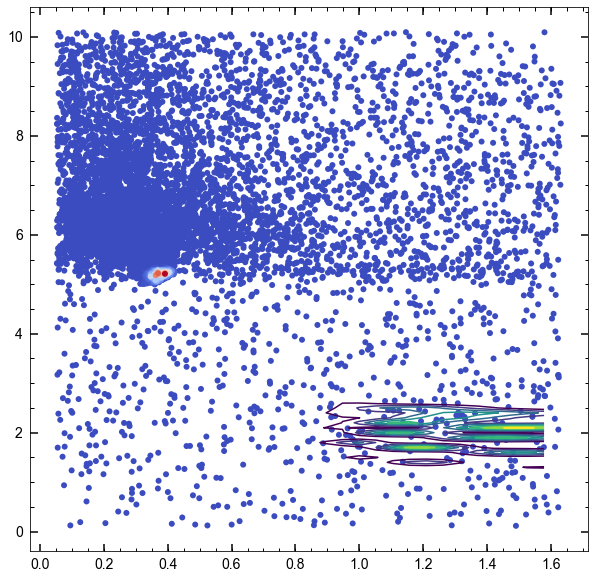

In [13]:
P = np.load('../../Quiescent_analysis/chidat/n21156_dtau_tZ_pos_lwa_dust.npy')
metal=np.arange(0.002,0.031,0.001)
age=np.arange(.5,6.1,.1)
M,A=np.meshgrid(metal/0.019,age)

plt.figure(figsize=(10, 10))
plt.scatter(dres.samples[:, 0], dres.samples[:, 1],
               marker='o', c=np.exp(dres.logl), linewidths=(0.,), cmap='coolwarm')

# plt.scatter(dres.samples[:, 0][IDX[242]], dres.samples[:, 1][IDX[242]],
#                marker='o', c='k')
plt.contour(M,A,P)


In [21]:
sp.params['compute_light_ages'] = True
lwa = np.zeros(len(dres.samples))
for i in range(len(dres.samples)):
    sp.params['logzsol'] = np.log10(dres.samples[i][0])
    sp.params['tau'] = dres.samples[i][2]
    sp.params['dust2'] = dres.samples[i][4]  
    wave, flux = sp.get_spectrum(tage = dres.samples[i][1])
    
    lwa[i] = interp1d(wave,flux)(4770)


In [40]:
sp.params['compute_light_ages'] = True
lwa2 = np.zeros(len(dres2.samples))
for i in range(len(dres2.samples)):
    sp.params['logzsol'] = np.log10(dres2.samples[i][0])
    sp.params['tau'] = dres2.samples[i][2]
    sp.params['dust2'] = dres2.samples[i][4]  
    wave, flux = sp.get_spectrum(tage = dres2.samples[i][1])
    
    lwa2[i] = interp1d(wave,flux)(4770)

In [38]:
sp.params['logzsol'] = np.log10(1)
sp.params['tau'] = 1
sp.params['dust2'] = 0.1  
wave, flux = sp.get_spectrum(tage = 0.5)
print(interp1d(wave,flux)(4770))

0.0920121117084283


/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


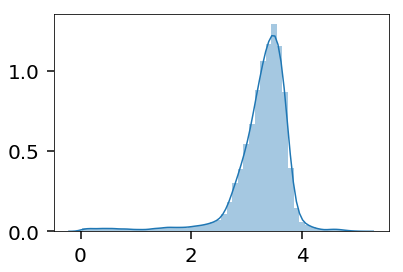

In [139]:
sea.distplot(dres1.samples[:,1])
# sea.distplot(lwa1)
# plt.xlim(0,5)

/Users/Vince.ec/miniconda3/envs/astroconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


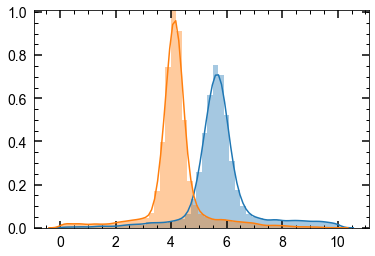

In [22]:
sea.distplot(dres.samples[:,1])
sea.distplot(lwa)

In [43]:
dres1.samples[:,1] = lwa1
dres2.samples[:,1] = lwa2

In [77]:
from dynesty.utils import quantile as _quantile
from scipy.ndimage import gaussian_filter as norm_kde

def Get_posterior(sample,logwt,logz):
    weight = np.exp(logwt - logz[-1])

    q = [0.5 - 0.5 * 0.999999426697, 0.5 + 0.5 * 0.999999426697]
    span = _quantile(sample.T, q, weights=weight)

    s = 0.02

    bins = int(round(10. / 0.02))
    n, b = np.histogram(sample, bins=bins, weights=weight,
                        range=np.sort(span))
    n = norm_kde(n, 10.)
    x0 = 0.5 * (b[1:] + b[:-1])
    y0 = n
    
    return x0, y0 / np.trapz(y0,x0)

[2.92597421e-05]


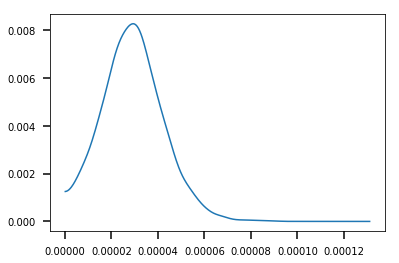

In [99]:
x,PX = Get_posterior(dres2b.samples[:,5], dres2['logwt'], dres2['logz'])

plt.plot(x,PX)
print(x[PX == max(PX)])

In [111]:
in1 = np.loadtxt('/Users/vestrada/alf/atlas_ssp_t03_Zp0.0.abund.krpa.s100').T

In [127]:
sp.params['logzsol'] = np.log10( 1 )
# sp.params['tau'] = 0.1
sp.params['sfh'] = 0

sp.params['dust2'] = 0.0

wave, flux = sp.get_spectrum(tage = 3, peraa = True)

(3.5, 4.5)

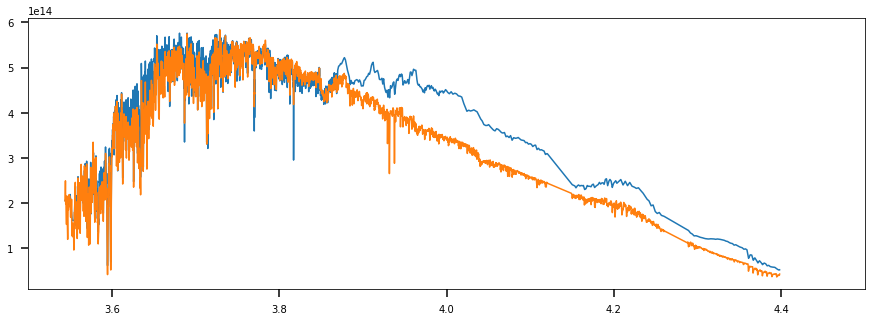

In [132]:
iflux = interp1d(wave,flux)(in1[0])
plt.figure(figsize=[15,5])
# plt.plot(np.log10(wave),flux*1.5E19)
plt.plot(np.log10(in1[0]), iflux*.9E19)
plt.plot(np.log10(in1[0]), (3E18 / in1[0]**2)*in1[1])



plt.xlim(3.5,4.5)

# review all completed cycles

In [31]:
dres1 = np.load('../data/out_dict/GND_21156_testfit_tmp_LF.npy').item()
dres2 = np.load('../data/out_dict/GND_21156_testfit_tmp_EF.npy').item()
dres3 = np.load('../data/out_dict/GND_21156_testfit_tmp_ND.npy').item()
dres4 = np.load('../data/out_dict/GND_21156_testfit_tmp_LF_tab.npy').item()
dres5 = np.load('../data/out_dict/GND_21156_testfit_tmp_EF_tab.npy').item()

dres6 = np.load('../data/out_dict/GND_21156_testfit_LF.npy').item()
dres7 = np.load('../data/out_dict/GND_21156_testfit_EF.npy').item()
dres8 = np.load('../data/out_dict/GND_21156_testfit_ND.npy').item()
dres9 = np.load('../data/out_dict/GND_21156_testfit_LF_tab.npy').item()

dres10 = np.load('../data/out_dict/GND_21156_testfit_EF_tab.npy').item()

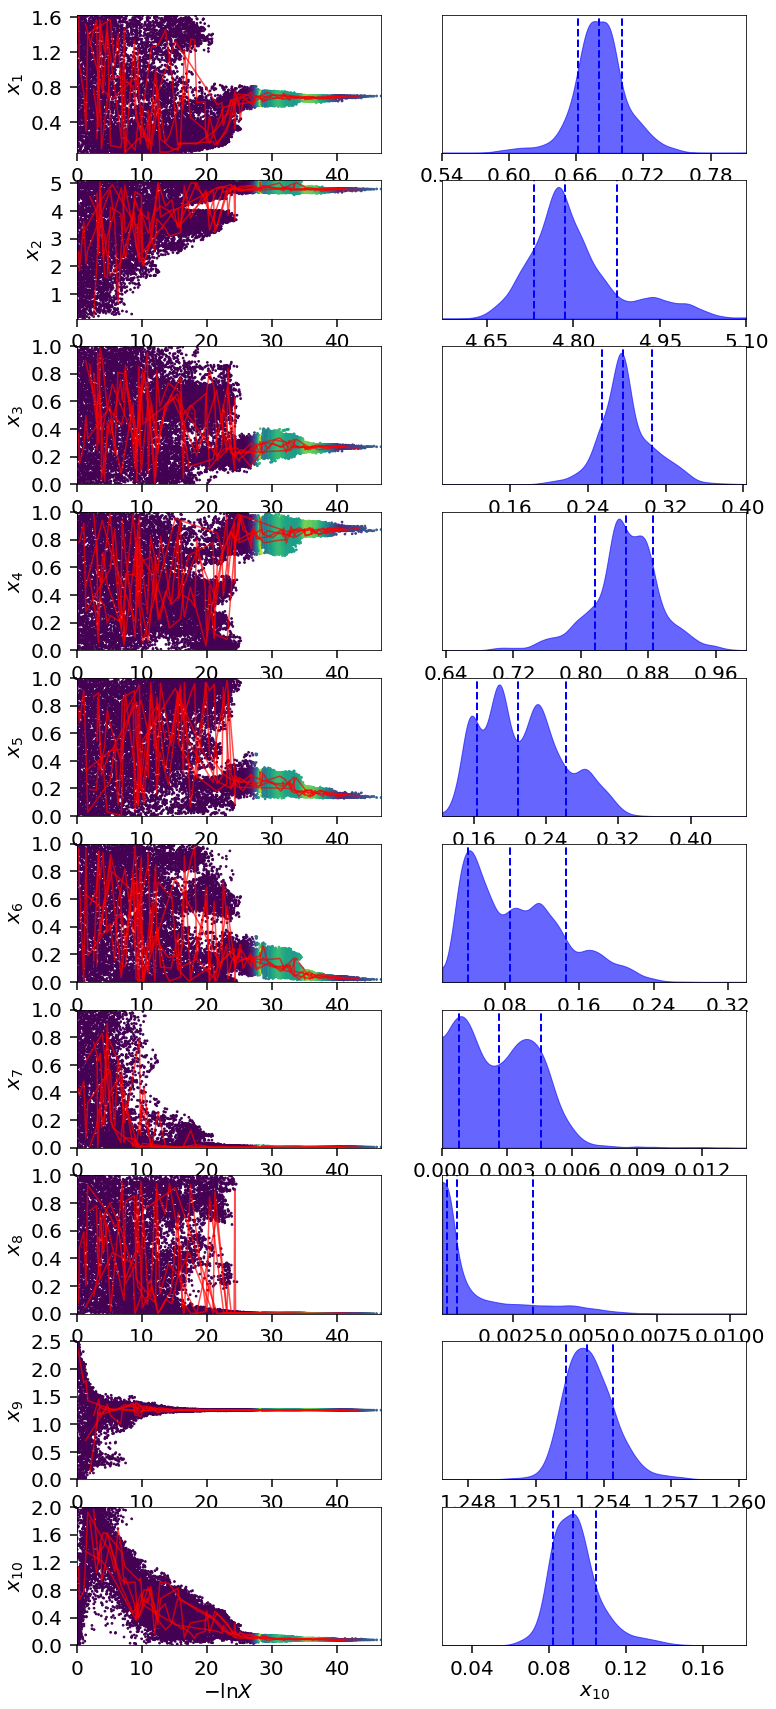

In [34]:
fig, axes = dyplot.traceplot(dres9, truths=None, truth_color='black',
                             show_titles=False, title_kwargs={'fontsize': 5, 'y': 1.05},
                             trace_cmap='viridis', kde=False,
                             connect=True, connect_highlight=range(5))

(<Figure size 1605.6x1605.6 with 100 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a88c549e8>,
       dtype=object))

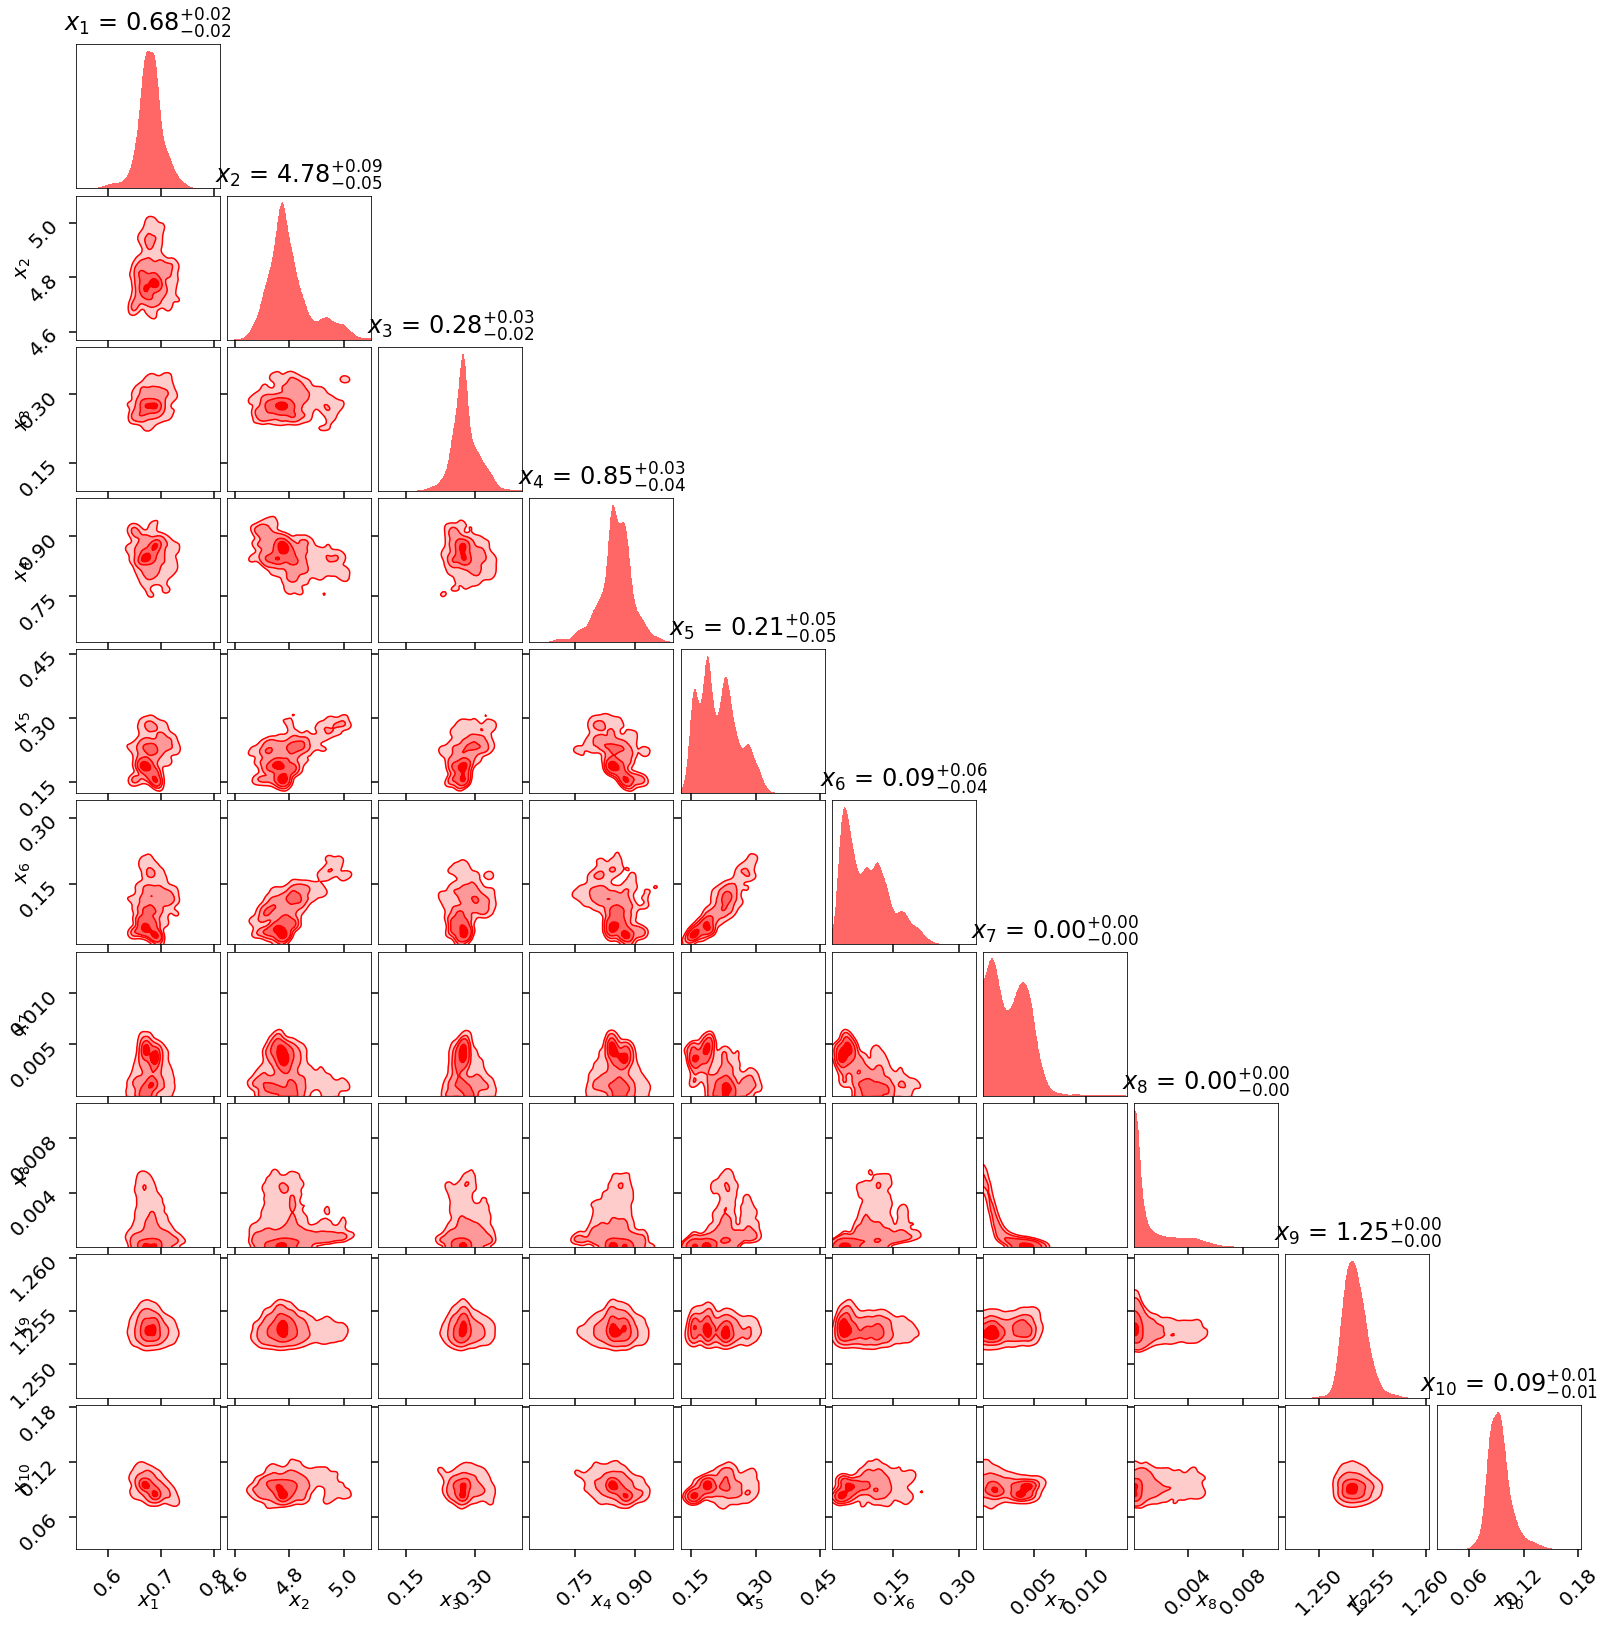

In [35]:
dyplot.cornerplot(dres9, color='red', truths=None, truth_color='black',#labels = ['Z','t','$\\tau$','z','Av'],
                           show_titles=True, title_kwargs={'y': 1.05}, 
                           quantiles=None, max_n_ticks=3, )

<ErrorbarContainer object of 3 artists>

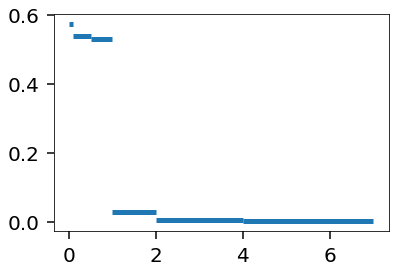

In [24]:
plt.errorbar(np.array([0.1, 0.5, 1, 2, 4, 7]),np.array([0.575, 0.539, 0.532, 0.027, 0.004,0.0004]),xerr = [[0.1,0.4,0.5,1,2,3],[0,0,0,0,0,0]],fmt = 'o',ms=0,linewidth=5)

<ErrorbarContainer object of 3 artists>

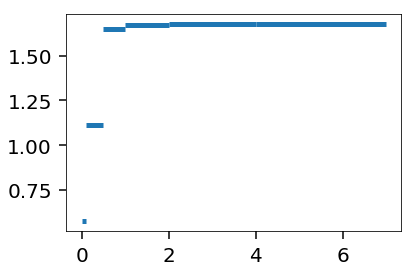

In [26]:
plt.errorbar(np.array([0.1, 0.5, 1, 2, 4, 7]),
             np.array([0.575, 0.539 + 0.575, 0.532 + 0.539 + 0.575, 0.027 + 0.532 + 0.539 + 0.575, 0.004 + 0.027 + 0.532 + 0.539 + 0.575,0.0004 + 0.004 + 0.027 + 0.532 + 0.539 + 0.575]),
             xerr = [[0.1,0.4,0.5,1,2,3],[0,0,0,0,0,0]],fmt = 'o',ms=0,linewidth=5)

In [33]:
np.where(dres1.logl == np.max(dres1.logl)),np.max(dres1.logl),dres1.samples[26460]

((array([26460]),),
 -93.11404487774317,
 array([0.32468948, 4.83708409, 0.49859328, 1.25364188, 0.20821861]))

In [35]:
np.where(dres6.logl == np.max(dres6.logl)),np.max(dres6.logl),dres6.samples[28730]

((array([28730]),),
 -212.87524121550115,
 array([0.6280001 , 5.09097778, 0.54372305, 1.25261409, 0.08475945]))

In [41]:
np.where(dres7.logl == np.max(dres7.logl)),np.max(dres7.logl),dres7.samples[28603]

((array([28603]),),
 -211.80592481091657,
 array([0.60347418, 5.68625517, 0.61053635, 1.25292823, 0.07791594]))

In [38]:
np.where(dres9.logl == np.max(dres9.logl)),np.max(dres9.logl),dres9.samples[32110]

((array([32110]),),
 -212.07630523308626,
 array([7.01082532e-01, 4.78812212e+00, 2.72526675e-01, 8.73381849e-01,
        1.34358664e-01, 1.78666045e-02, 5.39302455e-03, 1.37082047e-04,
        1.25280924e+00, 7.94224483e-02]))

In [69]:
np.where(dres10.logl == np.max(dres10.logl)),np.max(dres10.logl),dres10.samples[27588]

((array([27588]),),
 -205.36900949085887,
 array([ 0.64668916, 10.09676873,  0.30959742,  0.9492099 ,  0.88531001,
         0.6769806 ,  0.81779508,  0.14122372,  0.04172833,  1.25335991,
         0.10707565]))

In [13]:
np.where(dres.logl == np.max(dres.logl)),np.max(dres.logl),dres.samples[35673]

((array([35673]),),
 -199.3968913053439,
 array([5.95557527e-01, 9.66809769e-01, 1.49535237e+00, 2.32900348e-01,
        7.15368984e-02, 1.49897341e+00, 4.97765566e+00, 3.55015018e-01,
        1.80599659e-01, 8.20441816e-01, 4.34977115e-01, 1.00547157e-03,
        4.34187149e-03, 1.25319095e+00, 2.40421865e-01]))

432.4787478296225


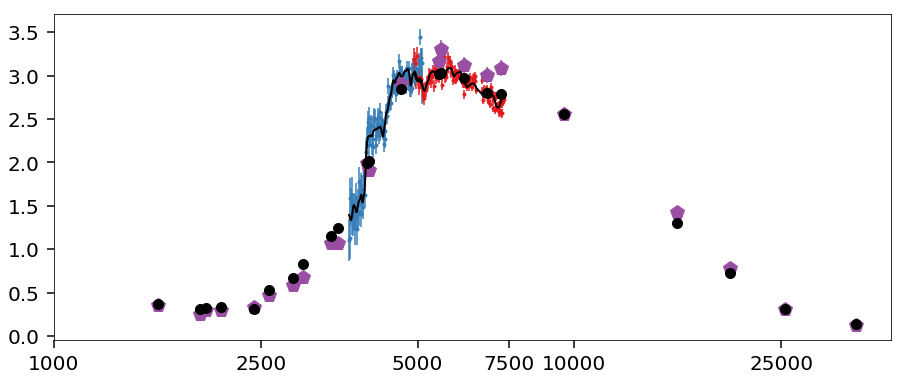

In [64]:
Gs.Sim_all(0.012/0.019, 4.93, 0.545, 1.2529, 0.06)

plt.figure(figsize = [15,6])
plt.errorbar(np.log10(Gs.Bwv_rf),Gs.Bfl*1E18, Gs.Ber*1E18,
                linestyle='None', marker='o', markersize=3, color='#377eb8')
plt.errorbar(np.log10(Gs.Rwv_rf),Gs.Rfl*1E18, Gs.Rer*1E18,
                linestyle='None', marker='o', markersize=3, color='#e41a1c')
plt.errorbar(np.log10(Gs.Pwv_rf),Gs.Pflx*1E18,Gs.Perr*1E18,
                                 linestyle='None', marker='p', markersize=15, color='#984ea3')
plt.plot(np.log10(Gs.Bwv_rf), Gs.Bmfl*1E18, 'k',linewidth=2, zorder=5)
plt.plot(np.log10(Gs.Rwv_rf), Gs.Rmfl*1E18, 'k',linewidth=2, zorder=5)
plt.plot(np.log10(Gs.Pwv_rf), Gs.Pmfl*1E18, 'ko', zorder=5,ms=10)
plt.xticks(np.log10([1000,2500,5000,7500,10000,25000]),[1000,2500,5000,7500,10000,25000])

Bchi = np.sum(((((Gs.Bfl) - Gs.Bmfl) / (Gs.Ber))**2))
Rchi = np.sum(((((Gs.Rfl) - Gs.Rmfl) / (Gs.Rer))**2))
Pchi = np.sum((((Gs.Pflx - Gs.Pmfl) / Gs.Perr)**2))
print(Bchi + Rchi + Pchi)

442.4641927282162


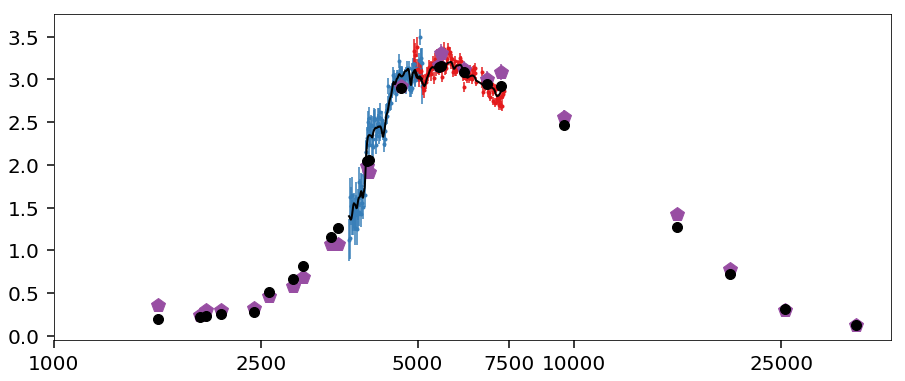

In [65]:
Gs.Sim_all(0.32468948, 4.83708409, 0.49859328, 1.25364188, 0.20821861)

plt.figure(figsize = [15,6])
plt.errorbar(np.log10(Gs.Bwv_rf),Gs.Bfl*1E18, Gs.Ber*1E18,
                linestyle='None', marker='o', markersize=3, color='#377eb8')
plt.errorbar(np.log10(Gs.Rwv_rf),Gs.Rfl*1E18, Gs.Rer*1E18,
                linestyle='None', marker='o', markersize=3, color='#e41a1c')
plt.errorbar(np.log10(Gs.Pwv_rf),Gs.Pflx*1E18,Gs.Perr*1E18,
                                 linestyle='None', marker='p', markersize=15, color='#984ea3')
plt.plot(np.log10(Gs.Bwv_rf), Gs.Bmfl*1E18, 'k',linewidth=2, zorder=5)
plt.plot(np.log10(Gs.Rwv_rf), Gs.Rmfl*1E18, 'k',linewidth=2, zorder=5)
plt.plot(np.log10(Gs.Pwv_rf), Gs.Pmfl*1E18, 'ko', zorder=5,ms=10)
plt.xticks(np.log10([1000,2500,5000,7500,10000,25000]),[1000,2500,5000,7500,10000,25000])

Bchi = np.sum(((((Gs.Bfl) - Gs.Bmfl) / (Gs.Ber))**2))
Rchi = np.sum(((((Gs.Rfl) - Gs.Rmfl) / (Gs.Rer))**2))
Pchi = np.sum((((Gs.Pflx - Gs.Pmfl) / Gs.Perr)**2))
print(Bchi + Rchi + Pchi)

416.6229833301954


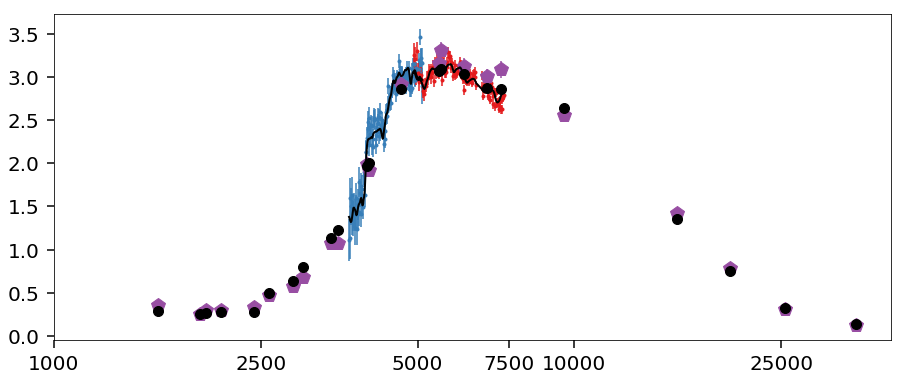

In [66]:
Gs.Sim_all(0.6280001 , 5.09097778, 0.54372305, 1.25261409, 0.08475945)

plt.figure(figsize = [15,6])
plt.errorbar(np.log10(Gs.Bwv_rf),Gs.Bfl*1E18, Gs.Ber*1E18,
                linestyle='None', marker='o', markersize=3, color='#377eb8')
plt.errorbar(np.log10(Gs.Rwv_rf),Gs.Rfl*1E18, Gs.Rer*1E18,
                linestyle='None', marker='o', markersize=3, color='#e41a1c')
plt.errorbar(np.log10(Gs.Pwv_rf),Gs.Pflx*1E18,Gs.Perr*1E18,
                                 linestyle='None', marker='p', markersize=15, color='#984ea3')
plt.plot(np.log10(Gs.Bwv_rf), Gs.Bmfl*1E18, 'k',linewidth=2, zorder=5)
plt.plot(np.log10(Gs.Rwv_rf), Gs.Rmfl*1E18, 'k',linewidth=2, zorder=5)
plt.plot(np.log10(Gs.Pwv_rf), Gs.Pmfl*1E18, 'ko', zorder=5,ms=10)
plt.xticks(np.log10([1000,2500,5000,7500,10000,25000]),[1000,2500,5000,7500,10000,25000])

Bchi = np.sum(((((Gs.Bfl) - Gs.Bmfl) / (Gs.Ber))**2))
Rchi = np.sum(((((Gs.Rfl) - Gs.Rmfl) / (Gs.Rer))**2))
Pchi = np.sum((((Gs.Pflx - Gs.Pmfl) / Gs.Perr)**2))
print(Bchi + Rchi + Pchi)

416.9092782718844


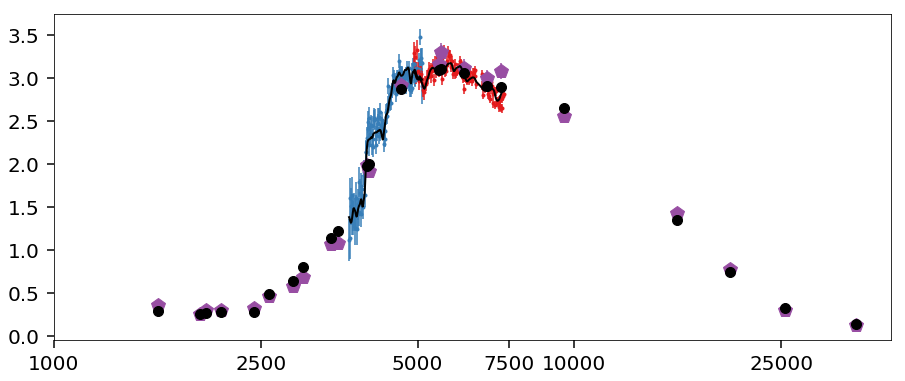

In [67]:
Gs.Sim_all(0.60347418, 5.68625517, 0.61053635, 1.25292823, 0.07791594)

plt.figure(figsize = [15,6])
plt.errorbar(np.log10(Gs.Bwv_rf),Gs.Bfl*1E18, Gs.Ber*1E18,
                linestyle='None', marker='o', markersize=3, color='#377eb8')
plt.errorbar(np.log10(Gs.Rwv_rf),Gs.Rfl*1E18, Gs.Rer*1E18,
                linestyle='None', marker='o', markersize=3, color='#e41a1c')
plt.errorbar(np.log10(Gs.Pwv_rf),Gs.Pflx*1E18,Gs.Perr*1E18,
                                 linestyle='None', marker='p', markersize=15, color='#984ea3')
plt.plot(np.log10(Gs.Bwv_rf), Gs.Bmfl*1E18, 'k',linewidth=2, zorder=5)
plt.plot(np.log10(Gs.Rwv_rf), Gs.Rmfl*1E18, 'k',linewidth=2, zorder=5)
plt.plot(np.log10(Gs.Pwv_rf), Gs.Pmfl*1E18, 'ko', zorder=5,ms=10)
plt.xticks(np.log10([1000,2500,5000,7500,10000,25000]),[1000,2500,5000,7500,10000,25000])

Bchi = np.sum(((((Gs.Bfl) - Gs.Bmfl) / (Gs.Ber))**2))
Rchi = np.sum(((((Gs.Rfl) - Gs.Rmfl) / (Gs.Rer))**2))
Pchi = np.sum((((Gs.Pflx - Gs.Pmfl) / Gs.Perr)**2))
print(Bchi + Rchi + Pchi)

In [39]:
0.2725, 0.8734, 0.1344, 0.0179, 0.0054, 0.0001,


sp.params['sfh'] = 3
sp.params['logzsol'] = np.log10( 0.70108)
sp.params['dust2'] = 0.079
sp.set_tabular_sfh(np.array([0.1, 0.5, 1, 2, 4, 6]),np.array([0.2725, 0.8734, 0.1344, 0.0179, 0.0054, 0.0001]))

wave,flux = sp.get_spectrum(tage = 4.788,peraa=True)
sp.params['sfh'] = 4

cleaned


/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.8.0_4_g1153432-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:548: RuntimeWarning: invalid value encountered in true_divide
  self.optimal_profile = m/m.sum(axis=0)
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.8.0_4_g1153432-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3423: RuntimeWarning: divide by zero encountered in true_divide
  self.ivar = 1/self.grism.data['ERR']**2


347.37621271091797


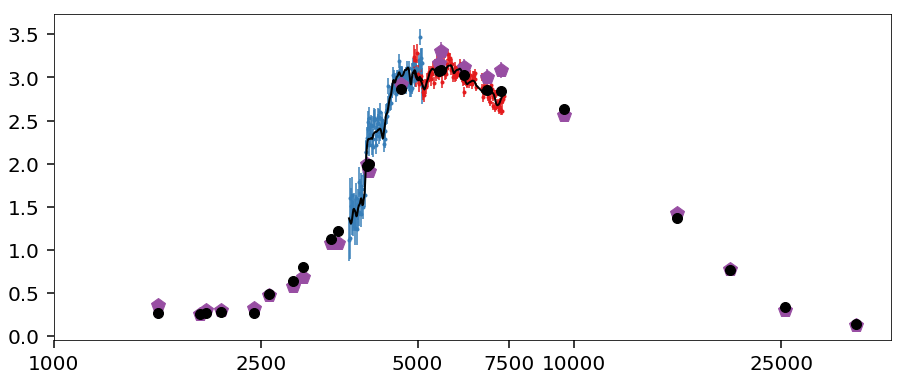

In [47]:
Gs = Gen_spec('GND', 21156, 1.25378,
               g102_lims=[8300, 11500], g141_lims=[11100, 16500],mdl_err = False, instr_err = False,
            phot_errterm = 0.03, decontam = True) 

Bmfl, Rmfl, Pmfl = Full_forward_model(Gs, wave, flux , 1.25280924)

PC= Scale_model(Gs.Pflx,Gs.Perr,Pmfl)

Bscale = Scale_model(Gs.Bfl, Gs.Ber, PC*Bmfl)
Rscale = Scale_model(Gs.Rfl, Gs.Rer, PC*Rmfl)

Bchi= np.sum(( (Gs.Bfl / Bscale - PC*Bmfl) / Gs.Ber/ Bscale)**2) 
Rchi= np.sum(( (Gs.Rfl / Rscale - PC*Rmfl) / Gs.Rer/ Rscale)**2) 
Pchi= np.sum(( (Gs.Pflx - PC*Pmfl) / Gs.Perr)**2) 

plt.figure(figsize = [15,6])
plt.errorbar(np.log10(Gs.Bwv_rf),Gs.Bfl*1E18 / Bscale,Gs.Ber*1E18/ Bscale,
                linestyle='None', marker='o', markersize=3, color='#377eb8')
plt.errorbar(np.log10(Gs.Rwv_rf),Gs.Rfl*1E18/ Rscale,Gs.Rer*1E18/ Rscale,
                linestyle='None', marker='o', markersize=3, color='#e41a1c')
plt.errorbar(np.log10(Gs.Pwv_rf),Gs.Pflx*1E18,Gs.Perr*1E18,
                                 linestyle='None', marker='p', markersize=15, color='#984ea3')
plt.plot(np.log10(Gs.Bwv_rf), PC*Bmfl*1E18, 'k', linewidth=2,zorder=5)
plt.plot(np.log10(Gs.Rwv_rf), PC*Rmfl*1E18, 'k',linewidth=2, zorder=5)
plt.plot(np.log10(Gs.Pwv_rf), PC*Pmfl*1E18, 'ko', zorder=5,ms=10)
plt.xticks(np.log10([1000,2500,5000,7500,10000,25000]),[1000,2500,5000,7500,10000,25000])
print(Bchi + Rchi + Pchi)

In [16]:
sp.params['sfh'] = 3
sp.params['dust2'] = 0.24
sp.set_tabular_sfh(np.array([0.1, 0.5, 1, 2, 4, 7]),np.array([0.355, 0.18, 0.82, 0.435, 0.001,0.004]),
        Z = np.array([0.5956, 0.96681, 1.495, 0.233, 0.07, 1.498]) * 0.019)

wave,flux = sp.get_spectrum(tage =4.977,peraa=True)
sp.params['sfh'] = 4


cleaned


/Users/Vince.ec/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.6.0_115_g3ce5ccf-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:544: RuntimeWarning: invalid value encountered in true_divide
  self.optimal_profile = m/m.sum(axis=0)
/Users/Vince.ec/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.6.0_115_g3ce5ccf-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3393: RuntimeWarning: divide by zero encountered in true_divide
  self.ivar = 1/self.grism.data['ERR']**2


400.81530599661414


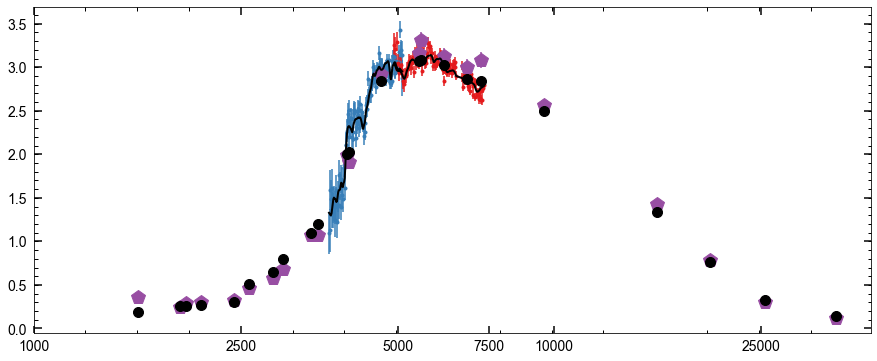

In [17]:
Gs = Gen_spec('GND', 21156, 1.25378,
               g102_lims=[8300, 11500], g141_lims=[11100, 16500],mdl_err = False, instr_err = False,
            phot_errterm = 0.03, decontam = True) 

Bmfl, Rmfl, Pmfl = Full_forward_model(Gs, wave, flux , 1.25319)

PC= Full_scale(Gs, Pmfl)

Bscale = Scale_model(Gs.Bfl, Gs.Ber, PC*Bmfl)
Rscale = Scale_model(Gs.Rfl, Gs.Rer, PC*Rmfl)

Bchi, Rchi, Pchi = Full_fit(Gs, PC * Bmfl, PC * Rmfl, PC * Pmfl)

plt.figure(figsize = [15,6])
plt.errorbar(np.log10(Gs.Bwv_rf),Gs.Bfl*1E18 / Bscale,Gs.Ber*1E18/ Bscale,
                linestyle='None', marker='o', markersize=3, color='#377eb8')
plt.errorbar(np.log10(Gs.Rwv_rf),Gs.Rfl*1E18/ Rscale,Gs.Rer*1E18/ Rscale,
                linestyle='None', marker='o', markersize=3, color='#e41a1c')
plt.errorbar(np.log10(Gs.Pwv_rf),Gs.Pflx*1E18,Gs.Perr*1E18,
                                 linestyle='None', marker='p', markersize=15, color='#984ea3')
plt.plot(np.log10(Gs.Bwv_rf), PC*Bmfl*1E18, 'k', linewidth=2,zorder=5)
plt.plot(np.log10(Gs.Rwv_rf), PC*Rmfl*1E18, 'k',linewidth=2, zorder=5)
plt.plot(np.log10(Gs.Pwv_rf), PC*Pmfl*1E18, 'ko', zorder=5,ms=10)
plt.xticks(np.log10([1000,2500,5000,7500,10000,25000]),[1000,2500,5000,7500,10000,25000])
print(Bchi + Rchi + Pchi)

/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in sqrt
  after removing the cwd from sys.path.
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in sqrt
  
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in sqrt
  


([<matplotlib.axis.XTick at 0x1a7bff2cc0>,
 <a list of 6 Text xticklabel objects>)

<Figure size 1080x432 with 0 Axes>

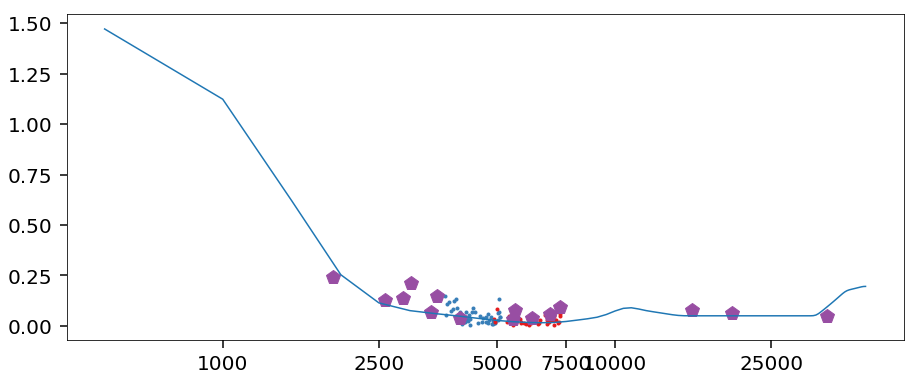

In [98]:
Gs.Sim_all(0.012/0.019, 4.93, 0.545, 1.2529, 0.06)
plt.figure(figsize = [15,6])
plt.figure(figsize = [15,6])
plt.plot(np.log10(Gs.Bwv_rf),np.sqrt(((Gs.Bfl - Gs.Bmfl) / Gs.Bfl)**2 - (Gs.Ber / Gs.Bfl)**2), 
                'o', markersize=3, color='#377eb8')
plt.plot(np.log10(Gs.Rwv_rf),np.sqrt(((Gs.Rfl - Gs.Rmfl) / Gs.Rfl)**2 - (Gs.Rer / Gs.Rfl)**2), 
                'o', markersize=3, color='#e41a1c')
plt.plot(np.log10(Gs.Pwv_rf),np.sqrt(((Gs.Pflx- Gs.Pmfl) / Gs.Pflx)**2 - (Gs.Perr / Gs.Pflx)**2),
                'p', markersize=15, color='#984ea3')
plt.plot(np.log10(wv),tmp)

plt.xticks(np.log10([1000,2500,5000,7500,10000,25000]),[1000,2500,5000,7500,10000,25000])


/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in sqrt
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in sqrt
  import sys


([<matplotlib.axis.XTick at 0x1a919d2b00>,
 <a list of 6 Text xticklabel objects>)

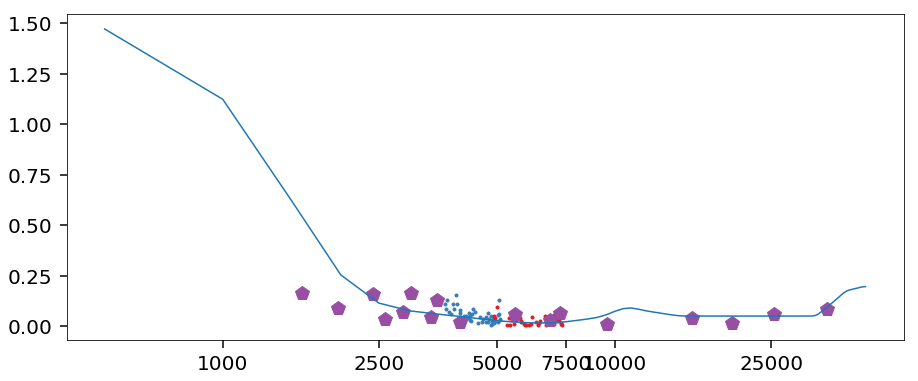

In [49]:
Gs.Sim_all(0.6280001 , 5.09097778, 0.54372305, 1.25261409, 0.08475945)
plt.figure(figsize = [15,6])
plt.plot(np.log10(Gs.Bwv_rf),np.sqrt(((Gs.Bfl - Gs.Bmfl) / Gs.Bfl)**2 - (Gs.Ber / Gs.Bfl)**2), 
                'o', markersize=3, color='#377eb8')
plt.plot(np.log10(Gs.Rwv_rf),np.sqrt(((Gs.Rfl - Gs.Rmfl) / Gs.Rfl)**2 - (Gs.Rer / Gs.Rfl)**2), 
                'o', markersize=3, color='#e41a1c')
plt.plot(np.log10(Gs.Pwv_rf),np.sqrt(((Gs.Pflx- Gs.Pmfl) / Gs.Pflx)**2 - (Gs.Perr / Gs.Pflx)**2),
                'p', markersize=15, color='#984ea3')
plt.plot(np.log10(wv),tmp)

plt.xticks(np.log10([1000,2500,5000,7500,10000,25000]),[1000,2500,5000,7500,10000,25000])

/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in sqrt
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in sqrt
  import sys


([<matplotlib.axis.XTick at 0x1a912b0438>,
 <a list of 6 Text xticklabel objects>)

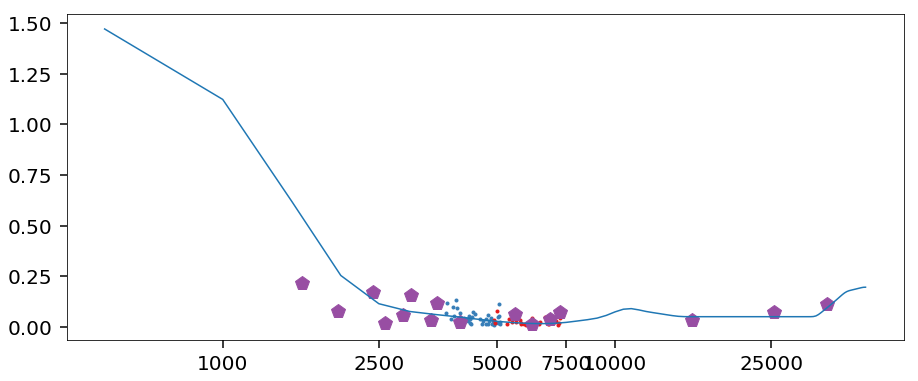

In [48]:
wv,tmp = np.load('../templates/mdl_EF.npy')
plt.figure(figsize = [15,6])
plt.plot(np.log10(Gs.Bwv_rf),np.sqrt(((Gs.Bfl/ Bscale - PC*Bmfl) / Gs.Bfl/ Bscale)**2 - (Gs.Ber / Gs.Bfl)**2), 
                'o', markersize=3, color='#377eb8')
plt.plot(np.log10(Gs.Rwv_rf),np.sqrt(((Gs.Rfl / Rscale- PC*Rmfl) / Gs.Rfl/ Rscale)**2 - (Gs.Rer / Gs.Rfl)**2), 
                'o', markersize=3, color='#e41a1c')
plt.plot(np.log10(Gs.Pwv_rf),np.sqrt(((Gs.Pflx- PC*Pmfl) / Gs.Pflx)**2 - (Gs.Perr / Gs.Pflx)**2),
                'p', markersize=15, color='#984ea3')
plt.plot(np.log10(wv),tmp)
plt.xticks(np.log10([1000,2500,5000,7500,10000,25000]),[1000,2500,5000,7500,10000,25000])

([<matplotlib.axis.XTick at 0x1a8e753dd8>,
 <a list of 6 Text xticklabel objects>)

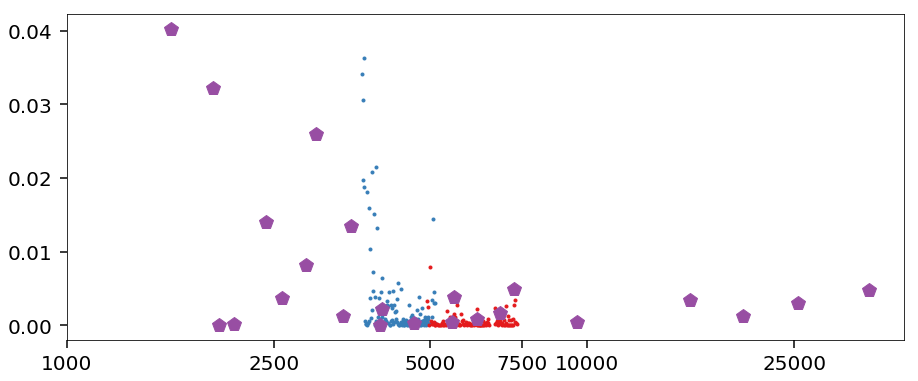

In [95]:
plt.figure(figsize = [15,6])
plt.plot(np.log10(Gs.Bwv_rf),((Gs.Bfl/ Bscale - PC*Bmfl) / Gs.Bfl/ Bscale)**2 , 
                'o', markersize=3, color='#377eb8')
plt.plot(np.log10(Gs.Rwv_rf),((Gs.Rfl / Rscale- PC*Rmfl) / Gs.Rfl/ Rscale)**2 , 
                'o', markersize=3, color='#e41a1c')
plt.plot(np.log10(Gs.Pwv_rf),((Gs.Pflx- PC*Pmfl) / Gs.Pflx)**2 ,
                'p', markersize=15, color='#984ea3')

# plt.plot(np.log10(Gs.Bwv_rf),((Gs.Bfl - Gs.Bmfl) / Gs.Bfl)**2, 
#                 'o', markersize=3, color='k')
# plt.plot(np.log10(Gs.Rwv_rf),((Gs.Rfl - Gs.Rmfl) / Gs.Rfl)**2, 
#                 'o', markersize=3, color='k')
# plt.plot(np.log10(Gs.Pwv_rf),((Gs.Pflx- Gs.Pmfl) / Gs.Pflx)**2,
#                 'p', markersize=15, color='k')

plt.xticks(np.log10([1000,2500,5000,7500,10000,25000]),[1000,2500,5000,7500,10000,25000])

In [ ]:
asdf